# Tips prediction at Restaurant using Machine learning Techniques

## IMPORT LIBRARIES

In [79]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## LOAD DATASET

In [80]:
data = pd.read_csv("tips.csv")
print(data.head(25))

    total_bill   tip     sex smoker  day    time  size
0        16.99  1.01  Female     No  Sun  Dinner     2
1        10.34  1.66    Male     No  Sun  Dinner     3
2        21.01  3.50    Male     No  Sun  Dinner     3
3        23.68  3.31    Male     No  Sun  Dinner     2
4        24.59  3.61  Female     No  Sun  Dinner     4
5        25.29  4.71    Male     No  Sun  Dinner     4
6         8.77  2.00    Male     No  Sun  Dinner     2
7        26.88  3.12    Male     No  Sun  Dinner     4
8        15.04  1.96    Male     No  Sun  Dinner     2
9        14.78  3.23    Male     No  Sun  Dinner     2
10       10.27  1.71    Male     No  Sun  Dinner     2
11       35.26  5.00  Female     No  Sun  Dinner     4
12       15.42  1.57    Male     No  Sun  Dinner     2
13       18.43  3.00    Male     No  Sun  Dinner     4
14       14.83  3.02  Female     No  Sun  Dinner     2
15       21.58  3.92    Male     No  Sun  Dinner     2
16       10.33  1.67  Female     No  Sun  Dinner     3
17       1

## GETTING TO KNOW THE DATASET

In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [82]:
data.shape

(244, 7)

In [83]:
data.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [84]:
data.values

array([[16.99, 1.01, 'Female', ..., 'Sun', 'Dinner', 2],
       [10.34, 1.66, 'Male', ..., 'Sun', 'Dinner', 3],
       [21.01, 3.5, 'Male', ..., 'Sun', 'Dinner', 3],
       ...,
       [22.67, 2.0, 'Male', ..., 'Sat', 'Dinner', 2],
       [17.82, 1.75, 'Male', ..., 'Sat', 'Dinner', 2],
       [18.78, 3.0, 'Female', ..., 'Thur', 'Dinner', 2]], dtype=object)

In [85]:
data

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [86]:
for column in data.columns:
    if data[column].dtype == "object":
        print(column.upper(), ": ", data[column].unique())
        print(data[column].value_counts())
        print("\n")
        print("*" * 55)
        print("\n")

SEX :  ['Female' 'Male']
Male      157
Female     87
Name: sex, dtype: int64


*******************************************************


SMOKER :  ['No' 'Yes']
No     151
Yes     93
Name: smoker, dtype: int64


*******************************************************


DAY :  ['Sun' 'Sat' 'Thur' 'Fri']
Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64


*******************************************************


TIME :  ['Dinner' 'Lunch']
Dinner    176
Lunch      68
Name: time, dtype: int64


*******************************************************




## DATA PREPROCESSING

In [87]:
#1. Checking null values
data.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



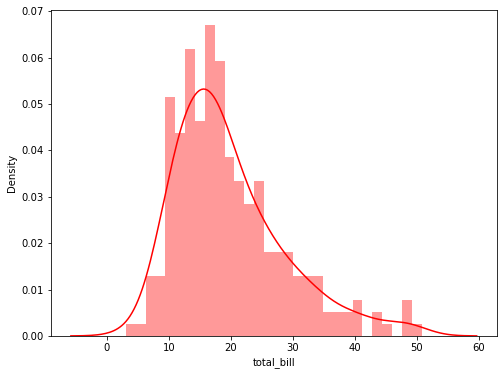

In [88]:
#checking the distribution of total_bill
plt.figure(figsize=(8,6))
sns.distplot(data.total_bill, color='red', bins=30)
plt.show()

## EXPLORATORY DATA ANALYSIS

In [89]:
#Summary of the dataset
#Numeric features
data.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [90]:
#Categorical features
data.describe(include="object")

,sex,smoker,day,time
count,244,244,244,244
unique,2,2,4,2
top,Male,No,Sat,Dinner
freq,157,151,87,176


## VISUALIZING THE RELATION BETWEEN TARGET AND VARIOUS COLUMNS

In [91]:
figure = px.scatter(data_frame = data, x="total_bill",
                    y="tip", size="size", color= "day", trendline="ols")
figure.show()

In [92]:
figure = px.scatter(data_frame = data, x="total_bill",
                    y="tip", size="size", color= "sex", trendline="ols")
figure.show()

In [93]:
figure = px.scatter(data_frame = data, x="total_bill",
                    y="tip", size="size", color= "time", trendline="ols")
figure.show()

In [94]:
figure = px.pie(data, values='tip', names='day',hole = 0.5)
figure.show()

In [95]:
figure = px.pie(data, values='tip', names='sex',hole = 0.5)
figure.show()

In [96]:
figure = px.pie(data, values='tip', names='smoker',hole = 0.5)
figure.show()

In [97]:
figure = px.pie(data, values='tip', names='time',hole = 0.5)
figure.show()

<AxesSubplot:>

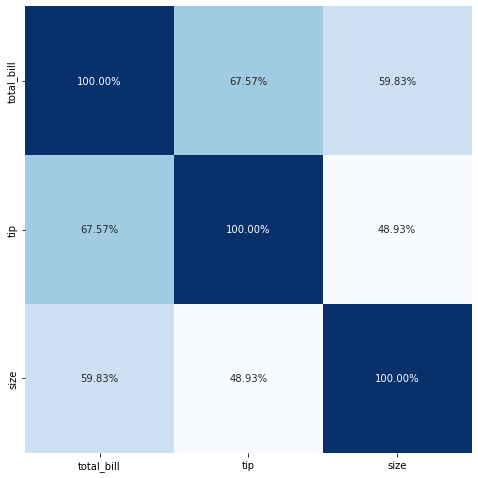

In [98]:
# Plotting the heatmap of correlation between features
plt.figure(figsize=(8,11))
sns.heatmap(data.corr(), cbar=False, square= True, fmt='.2%', annot=True, cmap="Blues")

In [99]:
data["sex"] = data["sex"].map({"Female": 0, "Male": 1})
data["smoker"] = data["smoker"].map({"No": 0, "Yes": 1})
data["day"] = data["day"].map({"Mon": 0, "Tue": 1, "Wed": 2, "Thur": 3, "Fri": 4, "Sat": 5, "Sun": 6})
data["time"] = data["time"].map({"Lunch": 0, "Dinner": 1})
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,6,1,2
1,10.34,1.66,1,0,6,1,3
2,21.01,3.50,1,0,6,1,3
3,23.68,3.31,1,0,6,1,2
4,24.59,3.61,0,0,6,1,4


## Linear Regression

In [100]:
X=np.array(data[["total_bill","sex","smoker","day","time","size"]])

Y=np.array(data["tip"])

In [103]:
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=42)

In [104]:
model_lr = LinearRegression()
model_lr.fit(xtrain, ytrain)

LinearRegression()

In [105]:
Y_pred1=model_lr.predict(xtrain)
Y_pred1

array([2.34150947, 3.19823585, 3.41869937, 4.60974922, 2.66195808,
       2.99178735, 2.38335861, 1.65466094, 2.77026933, 3.01313452,
       2.61988586, 4.64147042, 2.76133809, 3.17326416, 2.54740453,
       2.99787094, 3.03846591, 2.32371683, 1.51551481, 3.64928729,
       3.69877255, 3.48212967, 4.26051345, 2.78567514, 2.91852648,
       2.37282589, 3.48254683, 4.70622958, 4.00344122, 4.95974728,
       4.87035477, 2.07642699, 3.78658777, 3.21565435, 2.18313032,
       5.02774444, 2.88940303, 3.28422178, 2.60741452, 3.59152754,
       3.13669847, 2.46764258, 4.06089682, 1.95743196, 2.35906254,
       2.59905149, 2.09836579, 5.09993638, 2.77810546, 2.53744768,
       2.59853868, 2.80007313, 2.80993434, 2.93314099, 3.30226466,
       2.67988734, 2.35000912, 2.03835547, 2.13482139, 3.62205266,
       2.43356313, 2.73111713, 3.36728639, 4.18547946, 3.25055431,
       1.88969326, 2.464563  , 2.24923867, 4.07705973, 3.57830381,
       4.8814915 , 5.93663617, 2.34675874, 2.82655744, 2.85961

In [106]:
# Training Score
print("Training Accuracy:",model_lr.score(xtrain,ytrain)*100)

Training Accuracy: 45.65311254500954


In [107]:
# Testing Score
print("Testing Accuracy:",model_lr.score(xtest,ytest)*100)

Testing Accuracy: 44.29399687489899


In [108]:
predictions = model_lr.predict(xtest)
print('Mean Absolute Error:',metrics.mean_absolute_error(ytest, predictions))
print('Mean Squared Error:',metrics.mean_squared_error(ytest, predictions))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(ytest, predictions)))

Mean Absolute Error: 0.6685728160722872
Mean Squared Error: 0.6963090766605348
Root Mean Squared Error: 0.8344513626692299


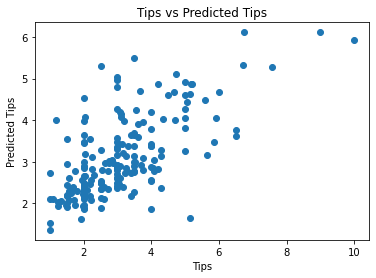

In [109]:
# Visualizing the differences between actual Tips and predicted values
plt.scatter(ytrain, Y_pred1)
plt.xlabel("Tips")
plt.ylabel("Predicted Tips")
plt.title("Tips vs Predicted Tips")
plt.show()

In [122]:
# features = [[total_bill, "sex", "smoker", "day", "time", "size"]]
features = np.array([[1000, 1, 1, 5, 1, 22]])
model_lr.predict(features)

array([99.98565346])